In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()

In [2]:
df = pd.read_csv('../data/crop_yield.csv')
print(df.head())

  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.24825

In [3]:
print(df.tail())

       Region Soil_Type    Crop  Rainfall_mm  Temperature_Celsius  \
999995   West      Silt    Rice   302.805345            27.987428   
999996  South    Chalky  Barley   932.991383            39.661039   
999997  North     Peaty  Cotton   867.362046            24.370042   
999998   West      Silt   Wheat   492.812857            33.045505   
999999   West     Sandy   Maize   180.936180            27.298847   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
999995            False            False             Sunny               76   
999996             True            False             Rainy               93   
999997             True            False            Cloudy              108   
999998            False            False             Sunny              102   
999999             True            False             Sunny               76   

        Yield_tons_per_hectare  
999995                1.347586  
999996                7.311594  
999997     

## What is the correlation between rainfall and crop yield for different types of crops?
- Will use the following columns: `Rainfall_mm`, `Crop`, `Yield_tons_per_hectare`
- Correlation code: Default to Pearson -> `corr, p_val = pearsonr(df[col1], df[col2])`
    - Should use Pearson because we're assuming a normal distribution with a linear relationship. Will double check by plotting the data.

In [4]:
unique_crops = df['Crop'].unique()
print(unique_crops)

['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']


In [6]:
max_yield = df.groupby('Crop')['Yield_tons_per_hectare'].max().sort_values()
print(max_yield)

Crop
Soybean    9.677596
Cotton     9.786272
Wheat      9.802534
Barley     9.949207
Maize      9.952983
Rice       9.963372
Name: Yield_tons_per_hectare, dtype: float64


The Pearson correlation between Rainfall_mm and Yield_tons_per_hectare for Soybean Crops is: 0.7635 with a p-value of: 0.0
The Pearson correlation between Rainfall_mm and Yield_tons_per_hectare for Soybean Crops is: 0.7683 with a p-value of: 0.0


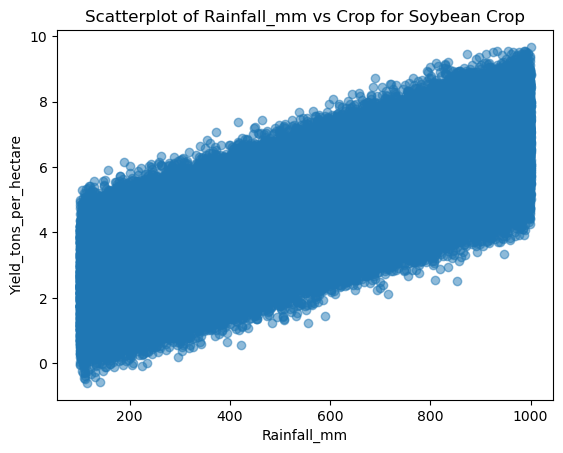

In [ ]:
from scipy.stats import pearsonr
var1 = 'Rainfall_mm'
var2 = 'Crop'
var3 = 'Yield_tons_per_hectare'
var4 = 'Soybean'

# Copy df with just soybean crop entries
soybean_df = df[df[var2] == var4]

# Apply pearson correlation between rainfall and yield for cotton crops
soybean_cor, soybean_p = pearsonr(soybean_df[var1], soybean_df[var3])
print(f'The Pearson correlation between {var1} and {var3} for {var4} Crops is: {soybean_cor:.4f} with a p-value of: {soybean_p}')

# Apply spearman correlation between rainfall and yield for cotton crops to double check
soybean_s_cor, soybean_s_p = spearmanr(soybean_df[var1], soybean_df[var3])
print(f'The Pearson correlation between {var1} and {var3} for {var4} Crops is: {soybean_s_cor:.4f} with a p-value of: {soybean_s_p}')

# Plot correlation 
plt.scatter(soybean_df[var1], soybean_df[var3], alpha=0.5)
plt.xlabel(var1)
plt.ylabel(var3)
plt.title(f'Scatterplot of {var1} vs {var2} for {var4} Crop')
plt.show()



The Pearson correlation between Rainfall_mm and Yield_tons_per_hectare for Rice Crops is: 0.7651 with a p-value of: 0.0
The Pearson correlation between Rainfall_mm and Yield_tons_per_hectare for Rice Crops is: 0.7700 with a p-value of: 0.0


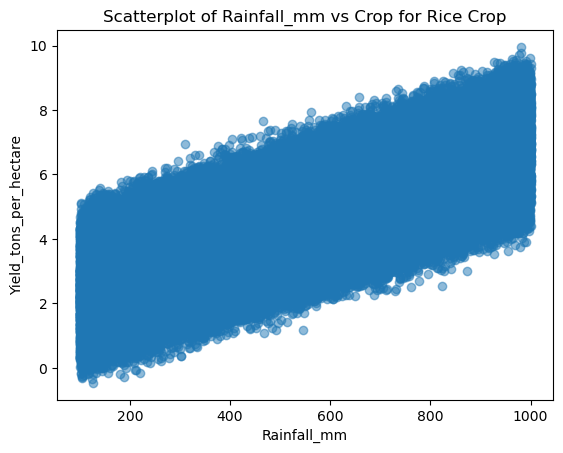

In [11]:
var4 = 'Rice'

# Copy df with just soybean crop entries
rice_df = df[df[var2] == var4]

# Apply pearson correlation between rainfall and yield for cotton crops
rice_cor, rice_p = pearsonr(rice_df[var1], rice_df[var3])
print(f'The Pearson correlation between {var1} and {var3} for {var4} Crops is: {rice_cor:.4f} with a p-value of: {rice_p}')

# Apply spearman correlation between rainfall and yield for cotton crops to double check
rice_s_cor, rice_s_p = spearmanr(rice_df[var1], rice_df[var3])
print(f'The Pearson correlation between {var1} and {var3} for {var4} Crops is: {rice_s_cor:.4f} with a p-value of: {rice_s_p}')

# Plot correlation 
plt.scatter(rice_df[var1], rice_df[var3], alpha=0.5)
plt.xlabel(var1)
plt.ylabel(var3)
plt.title(f'Scatterplot of {var1} vs {var2} for {var4} Crop')
plt.show()
